# Laporan Proyek ML Sistem Rekomendasi - Rizky Adhi Nugroho
* Email : nugrohorizkyadhi@gmail.com
#### Sistem rekomendasi untuk Buku

metode :
1.   Content based Filtering
2.   Collaborative filtering


## Data Loading

### import library dan dataset

In [ ]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
from pathlib import Path
import matplotlib.pyplot as plt

#import data dari drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Ekstrak zip file

In [ ]:
! unzip /content/drive/MyDrive/Booksrate.zip

Archive:  /content/drive/MyDrive/Booksrate.zip
replace BX_Books.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: BX_Books.csv            
replace BX-Book-Ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: BX-Book-Ratings.csv     


### buat path untuk dataset

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

rate = pd.read_csv('/content/BX-Book-Ratings.csv', 
                 sep=';', encoding = "ISO-8859-1") 
rate.tail()

,User-ID,ISBN,Book-Rating
5226,278418,0373079532,10
5227,278418,0373079729,8
5228,278418,0373079737,8
5229,278418,037307977X,10
5230,278418,0613325419,7


In [ ]:
df1 = pd.read_csv('/content/BX_Books.csv', 
                 sep=';', encoding = "ISO-8859-1") 
df1.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,"Image-URL-L,,,,,,,,"
5422,0140329358,Fangs of Fury (Puffin Adventure Gamebooks),Steve Jackson,1989,Puffin Books,http://images.amazon.com/images/P/0140329358.0...,http://images.amazon.com/images/P/0140329358.0...,http://images.amazon.com/images/P/0140329358.0...
5423,074324396X,Solomon Time: An Unlikely Quest in the South P...,Will Randall,2003,Scribner,http://images.amazon.com/images/P/074324396X.0...,http://images.amazon.com/images/P/074324396X.0...,http://images.amazon.com/images/P/074324396X.0...
5424,0552998486,Chocolat,Joanne Harris,2000,Black Swan,http://images.amazon.com/images/P/0552998486.0...,http://images.amazon.com/images/P/0552998486.0...,http://images.amazon.com/images/P/0552998486.0...
5425,0099759713,Rancid Aluminum,James Hawes,0,Trafalgar Square,http://images.amazon.com/images/P/0099759713.0...,http://images.amazon.com/images/P/0099759713.0...,http://images.amazon.com/images/P/0099759713.0...
5426,1853260193,Vanity Fair (Wordsworth Collection),William Makepeace Thackeray,1998,NTC/Contemporary Publishing Company,http://images.amazon.com/images/P/1853260193.0...,http://images.amazon.com/images/P/1853260193.0...,http://images.amazon.com/images/P/1853260193.0...


### deskripsi dataset (Eda Univariate)

#### dataset rate

In [ ]:
print(rate.describe())
print(rate.info())
print(rate.shape)

             User-ID  Book-Rating
count    5231.000000  5231.000000
mean   277703.788568     7.470273
std       531.027293     1.287469
min    276725.000000     1.000000
25%    277272.000000     7.000000
50%    277639.000000     7.000000
75%    278188.000000     8.000000
max    278418.000000    10.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5231 entries, 0 to 5230
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User-ID      5231 non-null   int64 
 1   ISBN         5231 non-null   object
 2   Book-Rating  5231 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 122.7+ KB
None
(5231, 3)


#### dataset df1 (book)

In [ ]:
print(df1.describe())
print(df1.info())
print(df1.shape)

       Year-Of-Publication
count          5427.000000
mean           1959.605675
std             265.866506
min               0.000000
25%            1992.000000
50%            1997.000000
75%            2001.000000
max            2005.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5427 entries, 0 to 5426
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 5427 non-null   object
 1   Book-Title           5427 non-null   object
 2   Book-Author          5427 non-null   object
 3   Year-Of-Publication  5427 non-null   int64 
 4   Publisher            5427 non-null   object
 5   Image-URL-S          5427 non-null   object
 6   Image-URL-M          5427 non-null   object
 7   Image-URL-L,,,,,,,,  5427 non-null   object
dtypes: int64(1), object(7)
memory usage: 339.3+ KB
None
(5427, 8)


## Data Pre-Processing & Preparation

### cek unique value

In [ ]:
#jumlah data unik berdasarkan kolom ISBN dari rating
print('Banyak data unik isbn rate: ', len(rate.ISBN.unique()))

Banyak data unik isbn rate:  4909


In [ ]:
#jumlah data unik berdasarkan kolom ISBN dari df1
print('Banyak data unik isbn df1: ', len(df1.ISBN.unique()))

Banyak data unik isbn df1:  5427


### gabungkan dua file menjadi 1 dataset

In [ ]:
rating_info = pd.concat([rate])

# Menggabungkan dataframe rating dengan book berdasarkan nilai ISBN
buku = pd.merge(rating_info, df1, on='ISBN', how='left')
buku

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,"Image-URL-L,,,,,,,,"
0,276725,034545104X,8,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,276727,0446520802,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,276729,052165615X,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,276729,0521795028,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5226,278418,0373079532,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5227,278418,0373079729,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5228,278418,0373079737,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5229,278418,037307977X,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### deskripsi dataset setelah digabungkan

In [ ]:
buku.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5231 entries, 0 to 5230
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User-ID              5231 non-null   int64  
 1   ISBN                 5231 non-null   object 
 2   Book-Rating          5231 non-null   int64  
 3   Book-Title           758 non-null    object 
 4   Book-Author          758 non-null    object 
 5   Year-Of-Publication  758 non-null    float64
 6   Publisher            758 non-null    object 
 7   Image-URL-S          758 non-null    object 
 8   Image-URL-M          758 non-null    object 
 9   Image-URL-L,,,,,,,,  758 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 449.5+ KB


### drop kolom yang tidak terpakai

In [ ]:
# menghapus kolom yang tidak terpakai pada data clean
kol = [5,6,7,8,9]
buku.drop(buku.columns[kol],axis=1,inplace=True)

### cek missing value dan menanganinya

In [ ]:
#cek missing value
print(buku.shape)
buku.isnull().sum()

(5231, 5)


User-ID           0
ISBN              0
Book-Rating       0
Book-Title     4473
Book-Author    4473
dtype: int64

In [ ]:
# Membersihkan missing value dengan fungsi dropna()
clean = buku.dropna()

In [ ]:
#cek missing value setelah di clean
print(clean.shape)
clean.isnull().sum()

(758, 5)


User-ID        0
ISBN           0
Book-Rating    0
Book-Title     0
Book-Author    0
dtype: int64

In [ ]:
# Mengecek berapa jumlah ISBN unik pada dataset clean
print('nomor ISBN unik :', len(clean.ISBN.unique()))
clean

nomor ISBN unik : 575


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
0,276725,034545104X,8,Flesh Tones: A Novel,M. J. Rose
10,276746,0425115801,9,Lightning,Dean R. Koontz
11,276746,0449006522,9,Manhattan Hunt Club,JOHN SAUL
12,276746,0553561618,9,Dark Paradise,TAMI HOAG
13,276746,055356451X,9,Night Sins,TAMI HOAG
...,...,...,...,...,...
5029,278418,0345384466,6,The Witching Hour (Lives of the Mayfair Witches),ANNE RICE
5031,278418,034538475X,7,The Tale of the Body Thief (Vampire Chronicles...,Anne Rice
5034,278418,0345391055,7,Disclosure,Michael Crichton
5124,278418,0373031114,9,"Girl He Left Behind (Harlequin Romance, No 3111)",Emma Goldrick


In [ ]:
#mengurutkan data clean berdasarkan ISBN
preparation = clean.sort_values('ISBN', ascending=True)
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
4338,278418,0020442408,7,Prince Caspian,C. S. Lewis
3989,278194,0020532105,10,CRY THE BELOVED COUNTRY (Scribner Classic),Alan Paton
4340,278418,0020532105,7,CRY THE BELOVED COUNTRY (Scribner Classic),Alan Paton
2387,277623,002542730X,5,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
1456,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
...,...,...,...,...,...
483,276925,8423970647,8,No Pasaran! El Videojuego,Chrstine Lehmann
486,276925,8427007450,8,Desaparecido: LA Autentica Historia De LA Ejec...,Thomas Hauser
348,276875,8806155873,7,Un Giorno Dopo L'altro,Carlo Lucarelli
389,276888,884590184X,7,Siddharta Romanzo Versione Di M Mila,Hermann Hesse


### bersihkan data terduplikasi

In [ ]:
# Membuang data duplikat pada variabel preparation
df = preparation.drop_duplicates('ISBN')
df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
4338,278418,0020442408,7,Prince Caspian,C. S. Lewis
3989,278194,0020532105,10,CRY THE BELOVED COUNTRY (Scribner Classic),Alan Paton
2387,277623,002542730X,5,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
1459,277427,0030615321,7,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau
1460,277427,0060002050,7,On a Wicked Dawn (Cynster Novels),Stephanie Laurens
...,...,...,...,...,...
483,276925,8423970647,8,No Pasaran! El Videojuego,Chrstine Lehmann
486,276925,8427007450,8,Desaparecido: LA Autentica Historia De LA Ejec...,Thomas Hauser
348,276875,8806155873,7,Un Giorno Dopo L'altro,Carlo Lucarelli
389,276888,884590184X,7,Siddharta Romanzo Versione Di M Mila,Hermann Hesse


### Buat plot untuk data rating

    jumlah sampel  persentase
8             219        38.1
7             174        30.3
9              69        12.0
10             37         6.4
5              33         5.7
6              29         5.0
4               7         1.2
3               4         0.7
2               3         0.5


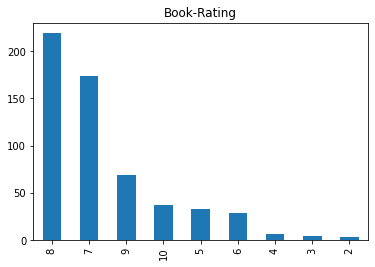

In [ ]:
import matplotlib.pyplot as plt

count = df['Book-Rating'].value_counts()
percent = 100*df['Book-Rating'].value_counts(normalize=True)
dt = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dt)
count.plot(kind='bar', title='Book-Rating');

### konversi data ke bentuk list

In [ ]:
# Mengonversi data series ‘ISBN’ menjadi dalam bentuk list
id_buku = df['ISBN'].tolist()
 
# Mengonversi data series ‘Book-Title’ menjadi dalam bentuk list
nama_buku = df['Book-Title'].tolist()
 
# Mengonversi data series ‘Book-Author’ menjadi dalam bentuk list
pengarang = df['Book-Author'].tolist()
 
print(len(id_buku))
print(len(nama_buku))
print(len(pengarang))

575
575
575


###membuat dictionary

In [ ]:
# Membuat dictionary untuk data ‘book_id’, ‘book_name’, dan ‘pengarang’
data = pd.DataFrame({
    'id': id_buku,
    'book_name': nama_buku,
    'pengarang': pengarang
})
data

,id,book_name,pengarang
0,0020442408,Prince Caspian,C. S. Lewis
1,0020532105,CRY THE BELOVED COUNTRY (Scribner Classic),Alan Paton
2,002542730X,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
3,0030615321,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau
4,0060002050,On a Wicked Dawn (Cynster Novels),Stephanie Laurens
...,...,...,...
570,8423970647,No Pasaran! El Videojuego,Chrstine Lehmann
571,8427007450,Desaparecido: LA Autentica Historia De LA Ejec...,Thomas Hauser
572,8806155873,Un Giorno Dopo L'altro,Carlo Lucarelli
573,884590184X,Siddharta Romanzo Versione Di M Mila,Hermann Hesse


##model content based filtering

### TF-IDF Vectorizer

In [ ]:
#membuat sistem rekomendasi buku berdasarkan pengarang buku
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data pengarang
tf.fit(data['pengarang']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names()

['adams',
 'adeline',
 'agatha',
 'alain',
 'alan',
 'albom',
 'alessandro',
 'alexander',
 'alice',
 'allen',
 'allende',
 'allison',
 'alvarez',
 'alvin',
 'amy',
 'anatoli',
 'andahazi',
 'anderson',
 'andre',
 'andrew',
 'andrews',
 'angelou',
 'anita',
 'ann',
 'anne',
 'annie',
 'antoine',
 'antonio',
 'applegate',
 'archer',
 'armistead',
 'arnold',
 'arthur',
 'arundhati',
 'ashley',
 'astrid',
 'atwood',
 'auel',
 'augusten',
 'ayn',
 'azar',
 'bach',
 'bailey',
 'baker',
 'baldacci',
 'banerjee',
 'banks',
 'bantock',
 'barbara',
 'baricco',
 'barjavel',
 'barr',
 'barry',
 'begley',
 'bellairs',
 'belva',
 'benjamin',
 'berendt',
 'bernard',
 'bernhard',
 'bernieres',
 'betty',
 'beverly',
 'bill',
 'billie',
 'binchy',
 'blake',
 'blissett',
 'blume',
 'bobbie',
 'bohjalian',
 'boukreev',
 'bradbury',
 'bradford',
 'braun',
 'bridwell',
 'brin',
 'bronte',
 'brooks',
 'brown',
 'buck',
 'burns',
 'burroughs',
 'caleb',
 'canfield',
 'capote',
 'card',
 'carey',
 'carl',
 'c

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['pengarang']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(575, 603)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.58905157]])

### Membuat dataframe untuk melihat tf-idf matrix

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan pengarang
# Baris diisi dengan nama buku
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data.book_name
).sample(22, axis=1).sample(10, axis=0)

,steinbeck,taylor,albom,brin,augusten,guterson,capote,monk,dietrich,mitch,sleator,molay,weiner,baricco,faolain,laurie,nora,allende,kirchner,wouk,dale,thomas
book_name,,,,,,,,,,,,,,,,,,,,,,
Le Divorce (William Abrahams Book),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tunnel Vision (V.I. Warshawski Novels (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hunting Season (Anna Pigeon Novels (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Balzac and the Little Chinese Seamstress,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The First Time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Reap the Wind,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Red Tent (Bestselling Backlist),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Lucky, Lucky Day (Full House Michelle)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Puerto Vallarta Squeeze,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama book
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['book_name'], columns=data['book_name'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap book
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (575, 575)


book_name,Alias Grace : A Novel,Alice's Adventures in Wonderland and Through the Looking Glass,Summer Sisters,The Jester,Children of the Night
book_name,,,,,
The Client,0.0,0.0,0.0,0.0,0.0
Inside-Outside Book of New York City,0.0,0.0,0.0,0.0,0.0
Chromosome 6,0.0,0.0,0.0,0.0,0.0
Perish Twice,0.0,0.0,0.0,0.0,0.0
The House With a Clock in Its Walls,0.0,0.0,0.0,0.0,0.0
"Girl He Left Behind (Harlequin Romance, No 3111)",0.0,0.0,0.0,0.0,0.0
Sick Puppy,0.0,0.0,0.0,0.0,0.0
The Girl Who Loved Tom Gordon,0.0,0.0,0.0,0.0,0.0
Silberfaden.,0.0,0.0,0.0,0.0,0.0


### Menampilkan Buku rekomendasi

In [ ]:
def book_recommendations(nama_buku, similarity_data=cosine_sim_df, items=data[['book_name', 'pengarang']], k=5):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_buku].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_book agar nama book yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_buku, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
data[data.book_name.eq('Fantastic Beasts and Where to Find Them')]

,id,book_name,pengarang
421,0613325419,Fantastic Beasts and Where to Find Them,J. K. Rowling


In [ ]:
# Mendapatkan rekomendasi book yang mirip dengan harry potter
book_recommendations('Fantastic Beasts and Where to Find Them')

,book_name,pengarang
0,Harry Potter and the Order of the Phoenix (Bo...,J. K. Rowling
1,Quidditch Through the Ages,J. K. Rowling
2,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling
4,Rebecca,Daphne Du Maurier


In [ ]:
data[data.book_name.eq('Dreamcatcher')]

,id,book_name,pengarang
498,074343627X,Dreamcatcher,Stephen King


In [ ]:
# Mendapatkan rekomendasi book yang mirip dengan dreamcatcher
book_recommendations('Dreamcatcher')

,book_name,pengarang
0,Different Seasons,Stephen King
1,Bag of Bones,Stephen King
2,Misery,Stephen King
3,The Girl Who Loved Tom Gordon : A Novel,Stephen King
4,The Green Mile,Stephen King


In [ ]:
data[data.book_name.eq('Ashes to Ashes')]

,id,book_name,pengarang
403,0553579606,Ashes to Ashes,TAMI HOAG


In [ ]:
# Mendapatkan rekomendasi book yang mirip dengan ashes to asesh
book_recommendations('Ashes to Ashes')

,book_name,pengarang
0,Night Sins,TAMI HOAG
1,Guilty as Sin,TAMI HOAG
2,Dark Paradise,TAMI HOAG
3,Mystic River,Dennis Lehane
4,Forever in Your Embrace,Kathleen E. Woodiwiss


In [ ]:
data[data.book_name.eq('Heaven and Earth (Three Sisters Island Trilogy)')]

,id,book_name,pengarang
376,0515132020,Heaven and Earth (Three Sisters Island Trilogy),Nora Roberts


In [ ]:
# Mendapatkan rekomendasi book yang mirip dengan heaven and earth
book_recommendations('Heaven and Earth (Three Sisters Island Trilogy)')

,book_name,pengarang
0,Irish Hearts,Nora Roberts
1,Carolina Moon,Nora Roberts
2,Rising Tides,Nora Roberts
3,Engaging The Enemy,Nora Roberts
4,Face the Fire (Three Sisters Island Trilogy),Nora Roberts


## model collaborative

### menyiapkan dataset

In [ ]:
# Membaca dataset
 
df = rate
df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,8
1,276726,0155061224,5
2,276727,0446520802,8
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
5226,278418,0373079532,10
5227,278418,0373079729,8
5228,278418,0373079737,8
5229,278418,037307977X,10


### data preparation (encode fitur user-id dan ISBN)

In [ ]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['User-ID'].unique().tolist()
print('list userID: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [276725, 276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 2

In [ ]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
ISBN_ids = df['ISBN'].unique().tolist()
 
# Melakukan proses encoding ISBN
book_to_book_encoded = {x: i for i, x in enumerate(ISBN_ids)}
 
# Melakukan proses encoding angka ke 
book_encoded_to_book = {i: x for i, x in enumerate(ISBN_ids)}
 
#Selanjutnya, petakan userID dan ISBN ke dataframe yang berkaitan.
 
# Mapping userID ke dataframe user
df['user'] = df['User-ID'].map(user_to_user_encoded)
 
# Mapping ISBN ke dataframe book
df['book'] = df['ISBN'].map(book_to_book_encoded)

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah book
num_book = len(book_encoded_to_book)
print(num_book)
 
# Mengubah rating menjadi nilai float
df['Book-Rating'] = df['Book-Rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['Book-Rating'])
 
# Nilai maksimal rating
max_rating = max(df['Book-Rating'])
 
print('Number of User: {}, Number of book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

679
4909
Number of User: 679, Number of book: 4909, Min Rating: 1.0, Max Rating: 10.0


### Membagi Data untuk Training dan Validasi

In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,User-ID,ISBN,Book-Rating,user,book
240,276852,055321358X,7.0,51,239
584,276929,2266096451,8.0,83,579
2259,277523,0385336357,10.0,288,2187
1420,277378,0804103658,7.0,238,1395
1835,277427,0821770829,7.0,255,1783
...,...,...,...,...,...
3092,277928,0937247065,8.0,476,2935
3772,278159,0385318073,5.0,574,3549
5191,278418,0373074050,8.0,678,4870
5226,278418,0373079532,10.0,678,4904


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = df[['user', 'book']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

### modeling dan training

In [ ]:
model = RecommenderNet(num_users, num_book, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
523/523 [==============================] - 3s 4ms/step - loss: 0.6770 - root_mean_squared_error: 0.2453 - val_loss: 0.6641 - val_root_mean_squared_error: 0.2333
Epoch 2/100
523/523 [==============================] - 2s 4ms/step - loss: 0.6047 - root_mean_squared_error: 0.1582 - val_loss: 0.6603 - val_root_mean_squared_error: 0.2291
Epoch 3/100
523/523 [==============================] - 2s 4ms/step - loss: 0.5929 - root_mean_squared_error: 0.1401 - val_loss: 0.6649 - val_root_mean_squared_error: 0.2340
Epoch 4/100
523/523 [==============================] - 2s 4ms/step - loss: 0.5877 - root_mean_squared_error: 0.1327 - val_loss: 0.6655 - val_root_mean_squared_error: 0.2346
Epoch 5/100
523/523 [==============================] - 2s 4ms/step - loss: 0.5859 - root_mean_squared_error: 0.1299 - val_loss: 0.6668 - val_root_mean_squared_error: 0.2360
Epoch 6/100
523/523 [==============================] - 2s 4ms/step - loss: 0.5829 - root_mean_squared_error: 0.1255 - val_loss: 0.6662 

### visualisasi metrik

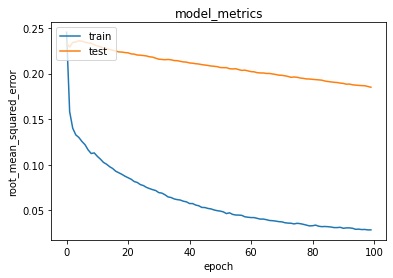

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## mendapatkan rekomendasi

In [ ]:
book_df = data
df = pd.read_csv('BX-Book-Ratings.csv', sep=';')
print(df)
# Mengambil sample user
user_id = df['User-ID'].sample(42).iloc[0]
book_read_by_user = df[df['User-ID'] == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
book_not_read = book_df[~book_df['id'].isin(book_read_by_user.ISBN.values)]['id'] 
book_not_read = list(
    set(book_not_read)
    .intersection(set(book_to_book_encoded.keys()))
)
 
book_not_read = [[book_to_book_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)

      User-ID        ISBN  Book-Rating
0      276725  034545104X            8
1      276726  0155061224            5
2      276727  0446520802            8
3      276729  052165615X            3
4      276729  0521795028            6
...       ...         ...          ...
5226   278418  0373079532           10
5227   278418  0373079729            8
5228   278418  0373079737            8
5229   278418  037307977X           10
5230   278418  0613325419            7

[5231 rows x 3 columns]


In [ ]:
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_read[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 10)
print('book with high ratings from user')
print('----' * 8)
 
top_book_user = (
    book_read_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
book_df_rows = book_df[book_df['id'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.book_name, '| from |', row.pengarang)
 
print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)
 
recommended_book = book_df[book_df['id'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.book_name, '| from |', row.pengarang)

Showing recommendations for users: 276925
book with high ratings from user
--------------------------------
Politically Correct Bedtime Stories: Modern Tales for Our Life and Times | from | James Finn Garner
La Sombra del Viento | from | Carlos Ruiz Zafon
--------------------------------
Top 10 book recommendation
--------------------------------
I Am Legend | from | Richard Matheson
The Once and Future King | from | T. H. White
Saving Faith | from | David Baldacci
Clifford's Sports Day | from | Norman Bridwell
The Encounter (Animorphs , No 3) | from | K. A. Applegate
The Message (Animorphs , No 4) | from | K. A. Applegate
The Good Earth (Enriched Classics) | from | Pearl S. Buck
Mama Makes Up Her Mind: And Other Dangers of Southern Living | from | Bailey White
Dilbert Fugitive From The Cubicle Police | from | Scott Adams
50 Simple Things You Can Do to Save the Earth | from | Earthworks Group
